In [1]:
# access heart disease dataset
url = 'https://media.githubusercontent.com/media/PacktPublishing/Hands-On-Gradient-Boosting-with-XGBoost-and-Scikit-learn/master/Chapter02/heart_disease.csv'
#!pip install xgboost
# import pandas
import pandas as pd
import matplotlib.pyplot as plt
# read csv file as dataframe df
df = pd.read_csv(url)

In [2]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
X = df.iloc[:, :-1]#all the rows of column 0:14
Y = df.iloc[:, -1]


In [5]:
from xgboost import XGBClassifier
# import cross_val_score for cross-validation
from sklearn.model_selection import cross_val_score
# score XGBClassifier
cross_val_score(XGBClassifier(), X, Y)

array([0.83606557, 0.85245902, 0.81967213, 0.8       , 0.76666667])

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=25)
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(242, 13) (242,) (61, 13) (61,)


In [7]:
XGB = XGBClassifier()
XGB.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [8]:
Y_pred = XGB.predict(X_test)

In [9]:
from sklearn.metrics import f1_score
print(f"accuracy is {f1_score(Y_test,Y_pred) * 100}%")

accuracy is 82.85714285714286%


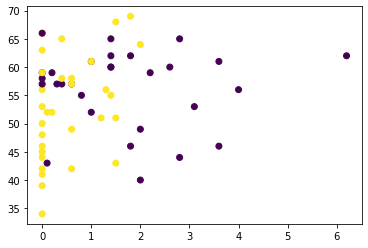

In [10]:
color = ['red','blue']
plt.scatter(X_test['oldpeak'].values,X_test['age'].values,c = Y_test)

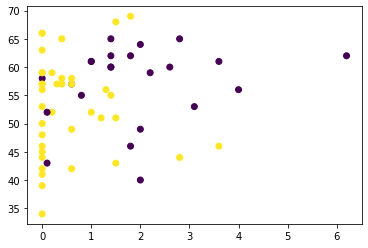

In [11]:
plt.scatter(X_test['oldpeak'].values,X_test['age'].values,c = Y_pred)